# インポート

In [142]:
import numpy as np
import sympy as sp
import pandas as pd
import csv as csv
import random
import scipy.integrate as scp
from scipy import optimize
from matplotlib import pyplot

# 熱情報の設定 

## 熱節点の情報をインポート

In [143]:

# 熱コンダクタンスが入っているファイルを開いて、csvで読み出す。そのあとリスト形式で文字列のまま読み出して二次元リストにする。
with open('Simple_Analysis.csv') as csv_file:
  f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
  l = [[row_ij for row_ij in row_i] for row_i in f]


# ノード数の取得 列方向のサイズを取得し、最初の列はノード名なので1引く
# print(l[3][0] == [] )  ← これだめ
N_node = np.size(l, axis = 1) - 1

# ノード間の熱コンダクタンスを文字列の形で取得。二次元リストはスライスで一気に取ることはできないので、行についてはfor文で取得
# k_str = [l[2 + i][1:] for i in range(N_node)]
# r_str = [l[4 + N_node + i ][1:] if l[4 + N_node + i ][1:]=='N/A' else 0 for i in range(N_node)]
k_ij = np.arange(N_node * N_node, dtype = float).reshape(N_node, N_node)
r_ij = np.arange(N_node * N_node, dtype = float).reshape(N_node, N_node)

for i in range(N_node):
  for j in range(N_node):
    if (l[i + 2][j + 1] == 'N/A' or l[i + 2][j + 1] == '' or l[i + 2][j + 1] == '#N/A') == False :
      k_ij[i][j] = float(l[i + 2][j + 1])
    else:
      k_ij[i][j] = 0.0
    if (l[i + 4 + N_node][j + 1] == 'N/A' or l[i + 4 + N_node][j + 1] == '' or l[i + 2][j + 1] == '#N/A') == False :
      r_ij[i][j] = float(l[i + 4 + N_node][j + 1])
    else:
      r_ij[i][j] = 0.0

      
# k_str = [[float(l[2 + i][1 + j]) if (l[2+ i][1 + j] != 'N/A' and l[2+ i][1 + j] != '') else 0.0 for j in range(N_node)] for i in range(N_node)]
# r_str = [[l[4 + N_node + i][1+ j] if l[4 + N_node + i][1 + j] != 'N/A' else 0 for j in range(N_node)] for i in range(N_node)]


# print(bool(l[2][3] == "0"))
# print(type(l))
# print(np.shape(l))
#print(float(l[2][2]))
print(k_ij)
# print(r_str)


# csv_file = open('/content/gdrive/My Drive/Research/LOTUS/ThermalAnalyze/Thermal_Node_Definition.csv', "r", encoding="ms932", errors="", newline="" )
# #リスト形式
# f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
# print(f.reader())

[[0.00000000e+00 1.33200000e+02 0.00000000e+00 1.50000000e-03
  0.00000000e+00 1.50000000e-03 0.00000000e+00]
 [1.33200000e+02 0.00000000e+00 3.00000000e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.00000000e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.95000000e+00 0.00000000e+00]
 [1.50000000e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.30000000e-03 3.30000000e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.60700000e+00]
 [1.50000000e-03 0.00000000e+00 9.95000000e+00 3.30000000e-03
  0.00000000e+00 0.00000000e+00 4.30909091e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.30000000e-03
  2.60700000e+00 4.30909091e-01 0.00000000e+00]]


## 熱伝導係数を保持するクラス

In [144]:
class Cond:
  def __init__(self, K_ij=0, R_ij=0):
    self.K_ij = K_ij
    self.R_ij = R_ij

## 各ノードの熱入出力や熱特性を保持するクラス

In [145]:
# Initialize Cond class class matrix
def init_cond(k_mat, r_mat):
  Cond_N = [[Cond(0,0) for i in range(len(k_mat[0]))] for j in range(len(k_mat[0]))]
  for Cond_N_i , k_i, r_i in zip(Cond_N, k_mat, r_mat):
    for Cond_N_ij, k_ij, r_ij in zip(Cond_N_i, k_i, r_i):
      Cond_N_ij.K_ij = k_ij
      Cond_N_ij.R_ij = r_ij
  return Cond_N

In [146]:
Cond_N = init_cond(k_ij, r_ij)
# ちゃんと格納されているか
print(Cond_N[0][1].K_ij)

133.2


## 衛星座標系の設定

In [147]:
# 座標変換行列
# C_b_to_i = 
# C_lvlh_to_i =

In [148]:
# 軌道情報


In [149]:
# 方向余弦を返す関数
def direction_cosine(a, b, c):
    return (np.array([np.cos(a), np.cos(b), np.cos(c)]))

In [150]:
# 機体固定座標からみた太陽方向(とりあえず今は固定させている)
sun_vec_from_b = direction_cosine(np.pi/4, np.pi/4, np.pi/2)
print(sun_vec_from_b)

# 機体固定座標絡みた地球方向(とりあえず今は固定させている)
earth_vec_from_b = direction_cosine(np.pi/2, np.pi/2, np.pi)
print(earth_vec_from_b)

# 衛星-地球-太陽の角度 80degくらいに設定
sat_earth_sun_angle=np.pi/2.5

[7.07106781e-01 7.07106781e-01 6.12323400e-17]
[ 6.123234e-17  6.123234e-17 -1.000000e+00]


In [151]:
# 衛星パネルクラス 熱計算をするときにこの情報からCondクラスに代入していく
class Panel:
    def __init__(self, width=0, height=0, thick=0, sp_cap=0, Q=0, angle_of_sun=0, angle_of_earth=0):
        self.width=width
        self.height=height
        self.area = width*height
        self.thick=thick
        self.sp_cap=sp_cap
        self.Q=Q
        self.angle_of_sun=angle_of_sun
        self.angle_of_earth=angle_of_earth
        self.cap=sp_cap*width*height*thick
        
    # 比熱容量を設定
    def update_capacity(self):
        self.cap=self.sp_cap*self.width*self.height*self.thick
    # パネル面積を設定
    def update_area(self):
        self.area=self.width*self.height
        

# 衛星外部パネルクラス Panelクラスを継承 太陽方向ベクトルとの内積計算のために法線ベクトルを追加する
class Ex_Panel(Panel):
    def __init__(self, width=0, height=0, thick=0, sp_cap=0, Q=0, angle_of_sun=0, angle_of_earth=0, F_pe=0, eps=0, alpha=0, n_vec=np.array([0.0, 0.0, 0.0]), sap_area_ratio=0, alm_area_ratio=0, osr_area_ratio=0):
        self.width=width
        self.height=height
        self.area = width*height
        self.thick=thick
        self.sp_cap=sp_cap
        self.Q=Q
        self.angle_of_sun=angle_of_sun
        self.angle_of_earth=angle_of_earth
        self.F_pe = F_pe
        self.eps = eps
        self.alpha = alpha
        self.n_vec=n_vec
        self.cap=sp_cap*width*height*thick
        self.sap_area_ratio = sap_area_ratio
        self.alm_area_ratio = alm_area_ratio
        self.osr_area_ratio = osr_area_ratio
        
    # 地球との形態係数
    def view_factor_plate_sphere(self, h, beta=False):
#         h = H/R
        if beta == False:
            beta=self.angle_of_earth
        if beta>np.pi/2:
            self.F_pe = 0
            return 0

        if beta-np.pi/2+np.arcsin(1/h)<0:
            self.F_pe=np.cos(beta)/h**2
        else:
            x=np.sqrt(h**2-1)/np.tan(beta)
            y=np.sqrt(1-x**2)
            self.F_pe=np.cos(beta)/np.pi/h/h*(np.pi-np.arccos(x)-x*y*(np.tan(beta))**2)+1.0/np.pi*np.arctan(y/x*np.cos(beta))
        return self.F_pe

### パネル情報の設定
SAP面: SAP8割, アルミ面2割 
放熱面: アルミ面2割, OSR8割

In [152]:
# LOTUSの情報をいれる
PX_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([1.0, 0.0, 0.0]), sap_area_ratio=0.8, alm_area_ratio=0.2)
MX_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([-1.0, 0.0, 0.0]), alm_area_ratio=0.2, osr_area_ratio=0.8)

PY_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([0.0, 1.0, 0.0]), sap_area_ratio=0.8, alm_area_ratio=0.2)
MY_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([0.0, -1.0, 0.0]), alm_area_ratio=0.2, osr_area_ratio=0.8)

PZ_Panel = Ex_Panel(width=300E-3, height=300E-3, thick=4, sp_cap=3, n_vec=np.array([0.0, 0.0, 1.0]), sap_area_ratio=0.8, alm_area_ratio=0.2)
MZ_Panel = Ex_Panel(width=300E-3, height=300E-3, thick=4, n_vec=np.array([0.0, 0.0, -1.0]), alm_area_ratio=0.2, osr_area_ratio=0.8)

In [153]:
print(PX_Panel.width)
PX_Panel.update_capacity()
PX_Panel.update_area()
print(PX_Panel.area)
print(PX_Panel.alm_area_ratio)

0.3
0.12
0.2


In [154]:
# 太陽方向ベクトルとの内積を考える
print(np.dot(PX_Panel.n_vec, sun_vec_from_b))
print(np.dot(MX_Panel.n_vec, sun_vec_from_b))

print(np.dot(PY_Panel.n_vec, sun_vec_from_b))
print(np.dot(MY_Panel.n_vec, sun_vec_from_b))

print(np.dot(PZ_Panel.n_vec, sun_vec_from_b))
print(np.dot(MZ_Panel.n_vec, sun_vec_from_b))

0.7071067811865476
-0.7071067811865476
0.7071067811865476
-0.7071067811865476
6.123233995736766e-17
-6.123233995736766e-17


In [155]:
# ベクトルのなす角を計算
def angle_of_vector(vec1, vec2):
    cos=np.dot(vec1, vec2)/np.linalg.norm(vec1, ord=2)/np.linalg.norm(vec2, ord=2)
    if cos < -1.0:
        cos = -1
    elif cos > 1.0:
        cos = 1
    return np.arccos(cos)

## 形態係数の式
http://www1.accsnet.ne.jp/~aml00731/c/thermal/View_Factor.pdf (微小平板の式を用いた）

In [156]:
# パネルへの各熱入力に対する形態係数を計算する
def view_factor_plate_sphere(h, beta):
#     h = H/R
    if beta>np.pi/2:
        return 0
    
    if beta-np.pi/2+np.arcsin(1/h)<0:
        F_12=np.cos(beta)/h**2
    else:
        x=np.sqrt(h**2-1)/np.tan(beta)
        y=np.sqrt(1-x**2)
        F_12=np.cos(beta)/np.pi/h/h*(np.pi-np.arccos(x)-x*y*(np.tan(beta))**2)+1.0/np.pi*np.arctan(y/x*np.cos(beta))
    return F_12

In [157]:
view_factor_plate_sphere(2, np.pi/2)

0.02883444281121869

In [158]:
# F_12をプロットしてみる
h=np.linspace(1.0000001,2,100)
F_12=np.zeros_like(h)
for i in range(len(h)):
    F_12[i]=view_factor_plate_sphere(h[i], np.pi/2)

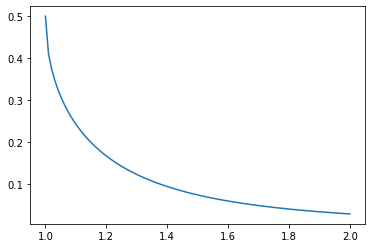

In [159]:
pyplot.plot(h, F_12)

In [160]:
# 太陽熱入力 1399[W/m]
E_s = 1353
# 地球赤外放射 264[W/m]
E_e = 237
# アルベド係数
alb_co = 0.60

In [161]:
# 地球半径 Re
Re = 6378
alt = 800
h_for_vf=(Re+alt)/Re
view_factor_plate_sphere(h_for_vf, np.pi/2)

0.21852622510204706

In [162]:
# 吸収率と放射率
alpha_s_osr = 0.077
eps_osr = 0.79
alpha_s_sap = 0.9
eps_sap = 0.8
alpha_s_alm = 0.5
eps_alm = 0.5

In [163]:
# SAPの効率
efficiency_sap = 0.3

In [164]:
# 放熱面面積の割合
radiator_rate = 0.6
A_all = PX_Panel.area+MX_Panel.area+PY_Panel.area+MY_Panel.area+PZ_Panel.area+MZ_Panel.area
A_rad = radiator_rate*A_all
print(A_rad)

0.39599999999999996


In [165]:
# パネルと太陽、地球との角度を計算
PX_Panel.angle_of_sun = angle_of_vector(PX_Panel.n_vec, sun_vec_from_b)
MX_Panel.angle_of_sun = angle_of_vector(MX_Panel.n_vec, sun_vec_from_b)
PY_Panel.angle_of_sun = angle_of_vector(PX_Panel.n_vec, sun_vec_from_b)
MY_Panel.angle_of_sun = angle_of_vector(MY_Panel.n_vec, sun_vec_from_b)
PZ_Panel.angle_of_sun = angle_of_vector(PZ_Panel.n_vec, sun_vec_from_b)
MZ_Panel.angle_of_sun = angle_of_vector(MZ_Panel.n_vec, sun_vec_from_b)

PX_Panel.angle_of_earth = angle_of_vector(PX_Panel.n_vec, earth_vec_from_b)
MX_Panel.angle_of_earth = angle_of_vector(MX_Panel.n_vec, earth_vec_from_b)
PY_Panel.angle_of_earth = angle_of_vector(PX_Panel.n_vec, earth_vec_from_b)
MY_Panel.angle_of_earth = angle_of_vector(MY_Panel.n_vec, earth_vec_from_b)
PZ_Panel.angle_of_earth = angle_of_vector(PZ_Panel.n_vec, earth_vec_from_b)
MZ_Panel.angle_of_earth = angle_of_vector(MZ_Panel.n_vec, earth_vec_from_b)

In [166]:
# 変更前
# 衛星の入熱（太陽からの入熱）: SAP+ALM+OSR
PX_Panel.Q=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MX_Panel.Q=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
PY_Panel.Q=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MY_Panel.Q=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
PZ_Panel.Q=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MZ_Panel.Q=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)

# 衛星の入熱（地球からの赤外入熱）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)

# 衛星の入熱（地球からのアルベド）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)

In [167]:
Q_in = PX_Panel.Q + MX_Panel.Q + PY_Panel.Q + MY_Panel.Q + PZ_Panel.Q + MZ_Panel.Q
Q_in

175.85450010636714

In [168]:
# 変更後
# 衛星の入熱（太陽からの入熱）: SAP+ALM+OSR
PX_Panel.Q=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*PX_Panel.sap_area_ratio + alpha_s_alm*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_sun))*E_s*PX_Panel.alm_area_ratio + alpha_s_osr*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_sun))*E_s*PX_Panel.osr_area_ratio
MX_Panel.Q=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*PX_Panel.sap_area_ratio + alpha_s_alm*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_sun))*E_s*MX_Panel.alm_area_ratio + alpha_s_osr*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_sun))*E_s*MX_Panel.osr_area_ratio
PY_Panel.Q=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*PY_Panel.sap_area_ratio + alpha_s_alm*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_sun))*E_s*PY_Panel.alm_area_ratio + alpha_s_osr*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_sun))*E_s*PY_Panel.osr_area_ratio
MY_Panel.Q=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*MY_Panel.sap_area_ratio + alpha_s_alm*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_sun))*E_s*MY_Panel.alm_area_ratio + alpha_s_osr*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_sun))*E_s*MY_Panel.osr_area_ratio
PZ_Panel.Q=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*PZ_Panel.sap_area_ratio + alpha_s_alm*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_sun))*E_s*PZ_Panel.alm_area_ratio + alpha_s_osr*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_sun))*E_s*PZ_Panel.osr_area_ratio
MZ_Panel.Q=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)*MZ_Panel.sap_area_ratio + alpha_s_alm*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_sun))*E_s*MZ_Panel.alm_area_ratio + alpha_s_osr*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_sun))*E_s*MZ_Panel.osr_area_ratio

# 衛星の入熱（地球からの赤外入熱）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.sap_area_ratio + alpha_s_alm*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.alm_area_ratio + alpha_s_osr*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.osr_area_ratio
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.sap_area_ratio + alpha_s_alm*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.alm_area_ratio + alpha_s_osr*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.osr_area_ratio
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.sap_area_ratio + alpha_s_alm*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.alm_area_ratio + alpha_s_osr*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.osr_area_ratio
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.sap_area_ratio + alpha_s_alm*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.alm_area_ratio + alpha_s_osr*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.osr_area_ratio
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.sap_area_ratio + alpha_s_alm*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.alm_area_ratio + alpha_s_osr*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.osr_area_ratio
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.sap_area_ratio + alpha_s_alm*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.alm_area_ratio + alpha_s_osr*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.osr_area_ratio

# 衛星の入熱（地球からのアルベド）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.sap_area_ratio + alpha_s_alm*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.alm_area_ratio + alpha_s_osr*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)*PX_Panel.osr_area_ratio
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.sap_area_ratio + alpha_s_alm*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.alm_area_ratio + alpha_s_osr*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)*MX_Panel.osr_area_ratio
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.sap_area_ratio + alpha_s_alm*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.alm_area_ratio + alpha_s_osr*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)*PY_Panel.osr_area_ratio
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.sap_area_ratio + alpha_s_alm*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.alm_area_ratio + alpha_s_osr*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)*MY_Panel.osr_area_ratio
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.sap_area_ratio + alpha_s_alm*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.alm_area_ratio + alpha_s_osr*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)*PZ_Panel.osr_area_ratio
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.sap_area_ratio + alpha_s_alm*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.alm_area_ratio + alpha_s_osr*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)*MZ_Panel.osr_area_ratio

In [169]:
print(PX_Panel.Q)
print(MX_Panel.Q)
print(PY_Panel.Q)
print(MY_Panel.Q)
print(PZ_Panel.Q)
print(MZ_Panel.Q)

69.34273762404251
0.0
69.34273762404251
0.0
4.50358227011163e-15
5.601975377345616


## TEC(Thermal Electric Cooler)のモデル化

### 参考ホームページ
https://fluffyandflakey.blog/2019/08/29/cooling-a-cpu-with-tecs/
https://www.qats.com/DataSheet/TEC_Modules (このファイルはこっちの式を採用)
https://www.meerstetter.ch/compendium/tec-peltier-element-design-guide (TECのスペック選びに使った)

\begin{align}
Q_c &= 2N \{S_{AB} I T_c - 2N \frac{k \rho}{R} (T_h - T_c) \} - \frac{1}{2} I^2 R \\
Q_h &= 2N \{S_{AB} I T_h - 2N \frac{k \rho}{R} (T_h - T_c) \} + \frac{1}{2} I^2 R \\
V &= 2N\{S_{AB} (T_h - T_c)\} + IR \\
COP &= \frac{Q_c}{VI} = \frac{2N\{S_{AB} I T_c - 2N\frac{k \rho}{R}(T_h-T_c)\}-\frac{1}{2}I^2 R}{VI}
\end{align}

\begin{align}
  & N : \text{The number of couples} && [-] \\
  & I : \text{Electric current passing through the Peltier} && [A] \\
  &V : \text{The voltage across TEC module} &&[V]\\
  &Q_c  : \text{Absorbed power on the Peltier cold side} && [W] \\
  &Q_h : \text{Power rejected by the Peltier hot side} &&[W]\\
  &S_{ab} : \text{the Seebeck coefficient} &&[V/K]\\
  &k : \text{Thermal conductivity of the module} &&[W/m \cdot K]\\
  &R : \text{Electric resistance of the module} &&[\Omega]\\
  &\rho : \text{Electrical resistivity} &&[\Omega \cdot m]\\
  &T_c : \text{Cold side temperature} &&[K] \\
  &T_h : \text{Hot side temperature} &&[K] \\
  &\Delta T = T_h - T_c : \text{Temperature difference} &&[K]\\
\end{align}

In [170]:
# ペルチェに関するクラス
class Peltier: 
    def __init__(self, sm=200e-6, km=1.5, rm=3.02, n=127, rho=10e-6):
        self.Sm_ab = sm
        self.Km = km
        self.Rm = rm
        self.Nm = n
        self.Rho = rho
  
    def cAlculate_Voltage(self, DT, I):
        return 2 * self.Nm * self.Sm_ab * DT + self.Rm * I
  
    def cAlculate_QC(self, TC, DT, I):
        return 2 * self.Nm * (self.Sm_ab*TC*I-2*self.Nm*self.Km*self.Rho/self.Rm*DT) - 0.5*self.Rm*I*I
  
    def cAlculate_QH(self, TH, DT, I):
        return 2 * self.Nm * (self.Sm_ab*TH*I-2*self.Nm*self.Km*self.Rho/self.Rm*DT) + 0.5*self.Rm*I*I
    
    def cAlculate_COP(self, TC, DT, I):
        V = self.cAlculate_Voltage(DT, I)
        QC = self.cAlculate_QC(TC, DT, I)
        return QC/(V*I)
    # Qc = 0 とおいてDTについて解く
    def cAlculate_DTmax(self, TH, I):
        return (self.Sm_ab * I * TH - I * I * self.Rm / (4.0 * self.Nm))/(self.Sm_ab * I + 2.0 * self.Nm * self.Km * self.Rho / self.Rm)
    def cAlculate_I_argmax_COP(self, TC, DT):
        I_cop_max = (4.0*self.Rho*self.Km*self.Nm*DT/(self.Sm_ab*self.Rm*(TC+TC+DT))*(1.0+np.sqrt(1+self.Sm_ab**2/2.0/self.Rho/self.Km*(TC+TC+DT))))
        return I_cop_max
    def cAlculate_I_with_const_power(self, DT, P_tec):
        I_const_power = (-self.Nm*self.Sm_ab*DT+np.sqrt((self.Nm*self.Sm_ab*DT)**2+P_tec*self.Rm))/self.Rm
        return I_const_power

In [171]:
# ペルチェクラスの初期化
pel = Peltier()

## TECの曲線のグラフ化

 ### $Q_C$ v.s. $\Delta T$

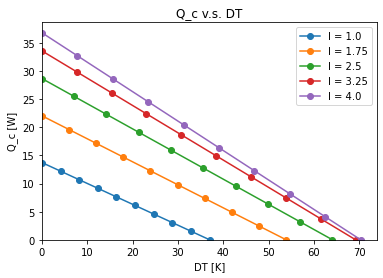

In [172]:
TH_graph = 300
I_graph_list = np.linspace(1.0, 4.0, 5)

for I_graph in I_graph_list:
    DT_max = pel.cAlculate_DTmax(TH_graph, I_graph)
    DT_graph = np.linspace(0.0, DT_max, 10)
    QC_graph = pel.cAlculate_QC(TH_graph-DT_graph, DT_graph, I_graph)
    pyplot.plot(DT_graph, QC_graph, '-o', label = 'I = {0}'.format(I_graph))

pyplot.title('Q_c v.s. DT')
pyplot.xlabel('DT [K]')
pyplot.ylabel('Q_c [W]')
pyplot.legend()
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.show()

 ### $V$ v.s. $\Delta T$

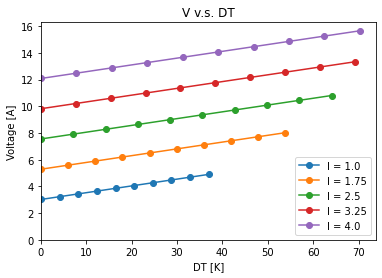

In [173]:
for I_graph in I_graph_list:
    DT_max = pel.cAlculate_DTmax(TH_graph, I_graph)
    DT_graph = np.linspace(0.0, DT_max, 10)
    V_graph = pel.cAlculate_Voltage(DT_graph, I_graph)
    pyplot.plot(DT_graph, V_graph, '-o', label = 'I = {0}'.format(I_graph))

pyplot.title('V v.s. DT')
pyplot.xlabel('DT [K]')
pyplot.ylabel('Voltage [A]')
pyplot.legend()
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.show()

### $COP$ v.s. $I$

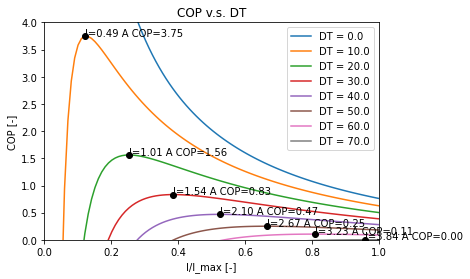

In [174]:
I_max = 4.0
DT_COP_list = np.linspace(0, 70, 8)
I_COP_graph = np.linspace(1.0e-4, 1, 100) * I_max

# DTによってCOPが最大になるIを格納
COP_max_value_list = []
I_max_by_COP_list = []

# COPとIをそれぞれfor文で回してリストを作成
for DT_COP_graph in DT_COP_list:
    COP_graph = []
    for I_COP in I_COP_graph:
        COP_graph.append(pel.cAlculate_COP(TH_graph - DT_COP_graph, DT_COP_graph, I_COP))
    COP_max_value = max(COP_graph)
    I_max_by_COP = I_COP_graph[COP_graph.index(COP_max_value)]
    COP_max_value_list.append(COP_max_value)
    I_max_by_COP_list.append(I_max_by_COP)
    pyplot.plot(I_COP_graph/I_max, COP_graph, '-', label = 'DT = {0}'.format(DT_COP_graph))

pyplot.plot(np.array(I_max_by_COP_list)/I_max, COP_max_value_list, 'ok')
for I_max_by_COP, COP_max_value in zip(I_max_by_COP_list, COP_max_value_list):
    if COP_max_value < 4.0:
        pyplot.text(I_max_by_COP/I_max, COP_max_value, 'I={0:.2f} A COP={1:.2f}'.format(I_max_by_COP,COP_max_value))
pyplot.title('COP v.s. DT')
pyplot.xlabel('I/I_max [-]')
pyplot.ylabel('COP [-]')
pyplot.legend()
pyplot.xlim(0,1.0)
pyplot.ylim(0,4)
pyplot.show()

### $COP$ v.s. $I$ 微分が正しいかどうかの確認

\begin{align}
COP &= \frac{Q_c}{VI} = \frac{2N\{S_{AB} I T_c - 2N\frac{k \rho}{R}(T_h-T_c)\}-\frac{1}{2}I^2 R}{\{2N\{S_{AB} (T_h - T_c)\} + IR\}I} \\
&= \frac{a_2I^2+a_1I+a_0}{b_2I^2+b_1I}
\end{align}

In [175]:
# DT=20のとき
a2 = -0.5*pel.Rm
a1 = 2.0*pel.Nm*pel.Sm_ab*(TH_graph-20)
a0 = -4*pel.Nm**2*pel.Km*pel.Rho/pel.Rm*20
b2 = pel.Rm
b1 = 2.0*pel.Sm_ab*pel.Nm*20
print("a2={0}\na1={1}\na0={2}\nb2={3}\nb1={4}".format(a2,a1,a0,b2,b1))

a2=-1.51
a1=14.224000000000002
a0=-6.40887417218543
b2=3.02
b1=1.016


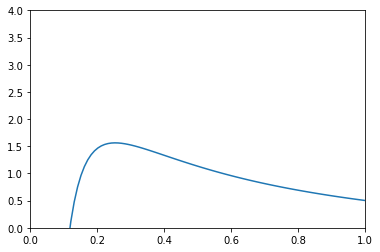

In [176]:
COP_graph_confirm=(a2*I_COP_graph**2+a1*I_COP_graph+a0)/(b2*I_COP_graph**2+b1*I_COP_graph)
pyplot.plot(I_COP_graph/I_max, COP_graph_confirm, '-')
pyplot.xlim(0,1.0)
pyplot.ylim(0,4)
pyplot.show()

$COP$が最大になる$I$は以下の式

\begin{align}
    I_{@maxCOP}=\frac{4\rho k N (T_h-T_c)}{S_{AB} R (T_h-T_c)} \{ 1+\sqrt{1+\frac{{S_{AB}}^2}{2 \rho k}(T_h+T_c)} \}
\end{align}

In [177]:
# I_max_COP = 4.0*pel.Rho*pel.Km*pel.Nm*20/(pel.Sm_ab*pel.Rm*(TH_graph+TH_graph-20))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(TH_graph+TH_graph-20)))
I_max_COP = pel.cAlculate_I_argmax_COP(TH_graph-DT_COP_list, DT_COP_list)
print(I_max_COP)

[0.         0.49964554 1.01434643 1.54488257 2.09208936 2.65686276
 3.24016488 3.84303024]


# TEC制御

\begin{align}
  &C_o = 29.48 : \text{Capacity of the object} && [J/K] \\
  &C_{s1} = 3.6 : \text{Capacity of the cold side of the Peltier} && [J/K] \\
  &C_{s2} = 3.6 : \text{Capacity of the cold side of the Peltier} &&[J/K]\\
  &K_{o,s1} = 1.8 : \text{Conductivity between the object and the cold side of the Peltier} &&[W/K]\\
  &R_{s2,a} = 1.53e-10 : \text{Conductivity of the cold side of the Peltier} &&[W/K^4]\\
\end{align}

In [178]:
# # 初期状態
# T0 = [263, 263, 263, 3]
# C = [29.48, 3.6, 3.6, 1e+10]
# Qg = [1, 0, 0, 0]
# I = 0
# 消費電力
P_gen = 50

# TECに供給する電力
P_tec_ratio = 0.08
P_tec = P_tec_ratio * P_gen
# COPはとりあえず2くらい
COP_tec = 2
# QcはCOP*供給電力
Qc_tec = P_tec * COP_tec
# ステファンボルツマン定数
sigma = 5.669E-8

T0 = [273, 273, 273, 273, 273, 273, 273]
T_obj_list = np.linspace(200, 270, 100)
P_gen_list = np.linspace(10, 50, 100)
# C=[1000, 1000, 1000, 1000, 1000, 1000, 1000]
C =  [18.3, 15.0, 15.0, 976.8, 29191.7, 2043.4, 2043.4]
Qg = [1.0, 0, 0, 0, 0, 0, 0]

In [97]:
# 制御パラメータ
# Kp = 0.0001
# Kd = 0.0001

In [98]:
# 目標値
# T_obj_d = 213

In [179]:
# 熱伝導方程式
def dT_dt(T, Cond_N, C, Qg):
    dTdt=[]
    for T_i, Cond_N_i, C_i, Qg_i in zip(T, Cond_N, C, Qg):
        Q_cond_i = 0
        for Cond_N_ij, T_j in zip(Cond_N_i,T):
            Q_cond_i += Cond_N_ij.K_ij*(T_i - T_j) + Cond_N_ij.R_ij*(T_i**4 - T_j**4)
        dTdt.append((Qg_i - Q_cond_i)/C_i)
    return dTdt

In [180]:
# dT_dt(T0, Cond_N, C, Qg)

In [181]:
# def system(t, x):
#     global I
#     dI = - Kp * (T_obj_d - x[1]) - Kd * dT_dt(x, Cond_N, C, Qg)[1]
#     I = I + dI
#     if I>0:
#         I = min(I_max, I)
#     else:
#         I = 0
#     Qg[1] = pel.cAlculate_QC(x[1], x[2]-x[1], I)
#     Qg[2] = pel.cAlculate_QH(x[2], x[2]-x[1], I)
    
#     y = dT_dt(x, Cond_N, C, Qg)
#     return y

In [182]:
# def simulation(x0, end, step):
#     T_obj = []
#     t = []
#     I_rec = []
#     ode =  scp.ode(system)
#     ode.set_integrator('dopri5', method='bdf', atol=1.0e-2)
#     ode.set_initial_value(x0, 0)
#     t.append(0)
#     T_obj.append(x0[0])
#     I_rec.append(0)
#     while ode.successful() and ode.t < end - step:
#         ode.integrate(ode.t + step)
#         t.append(ode.t)
#         T_obj.append(ode.y[1])
#         I_rec.append(I)
#     return T_obj, I_rec, t

In [183]:
# def Q_generated(T):
#     Gg=

In [184]:
def system(t, x):
    Qg[1]= -Qc_tec
    Qg[2]= P_tec+Qc_tec
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    
    y = dT_dt(x, Cond_N, C, Qg)
    return y

In [185]:
# TEC制御なしバージョン
def simulation(x0, end, step):
    T_obj = []
    T_tec_c = []
    T_tec_h = []
    T_ins = []
    T_pgen = []
    T_out = []
    T_in = []
    t = []
    ode =  scp.ode(system)
    ode.set_integrator('dopri5', method='bdf', atol=1.0e-2)
    # 最小値は0(絶対零度)にクリッピングさせる
    x0=np.clip(x0, 0.0, None)
    ode.set_initial_value(x0, 0)
    t.append(0)
    T_obj.append(x0[0])
    T_tec_c.append(x0[1])
    T_tec_h.append(x0[2])
    T_ins.append(x0[3])
    T_pgen.append(x0[4])
    T_out.append(x0[5])
    T_in.append(x0[6])
    while ode.successful() and ode.t < end - step:
        # 最小値をゼロにクリッピングさせる
        ode.y[0:6]=np.clip(ode.y[0:6], 0.0, None)
        ode.integrate(ode.t + step)
        t.append(ode.t)
        T_obj.append(ode.y[0])
        T_tec_c.append(ode.y[1])
        T_tec_h.append(ode.y[2])
        T_ins.append(ode.y[3])
        T_pgen.append(ode.y[4])
        T_out.append(ode.y[5])
        T_in.append(ode.y[6])
    return T_obj, T_tec_c, T_tec_h, T_ins, T_pgen, T_out, T_in, t

### シミュレーション開始

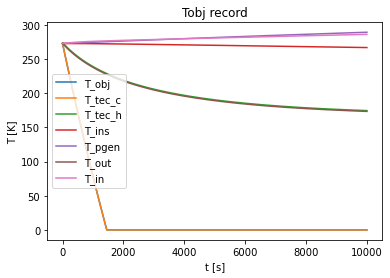

In [125]:
I = 0
end = 10000
step = 1

T_obj, T_tec_c, T_tec_h, T_ins, T_pgen, T_out, T_in, t = simulation(T0, end, step)

# 
pyplot.title('Tobj record')
pyplot.xlabel('t [s]')
pyplot.ylabel('T [K]')
pyplot.plot(t, T_obj,'-', label = "T_obj")
pyplot.plot(t, T_tec_c,'-', label = "T_tec_c")
pyplot.plot(t, T_tec_h,'-', label = "T_tec_h")
pyplot.plot(t, T_ins,'-', label = "T_ins")
pyplot.plot(t, T_pgen,'-', label = "T_pgen")
pyplot.plot(t, T_out,'-', label = "T_out")
pyplot.plot(t, T_in,'-', label = "T_in")
pyplot.legend()
pyplot.show()

# pyplot.title('I record')
# pyplot.xlabel('t [s]')
# pyplot.ylabel('I [A]')
# pyplot.plot(t, I_record,'-')
# pyplot.show()

In [126]:
T_tec_c[-1]

-0.18041015788480919

In [296]:
# 定常状態を非線形連立方程式で解く
# def func(x):
#     y = []
#     y.append(200 + 50*(x[0]-x[1])+100*(x[0]**4-x[1]**4))
#     y.append(100 + 10*(x[1]-x[1])+50*(x[1]**4-x[0]**4))
#     return y

In [297]:
# def func(x):
#     return [200 + 50*(x[0]-x[1])+100*(x[0]**4-x[1]**4),
#             100 + 10*(x[1]-x[1])+50*(x[1]**4-x[0]**4)]

In [298]:
# result = optimize.root(func, [0.0, 0.0], method="broyden1")
# print(result)

In [127]:
# 定常状態を非線形連立方程式で解く（dT/dtを利用した場合）
# TECを動かす前
def func1(x):
#     Qg[1]= -Qc_tec
#     Qg[2]= P_tec+Qc_tec
#     Qg[1] = (4.0*pel.Rho*pel.Km*pel.Nm*(x[2]-x[1])/(pel.Sm_ab*pel.Rm*(x[1]+x[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(x[1]+x[2]))))
#     I_cpmax = pel.cAlculate_I_argmax_COP(x[1], x[2]-x[1])
#     Qg[1]= - pel.cAlculate_QC(x[1], x[2]-x[1], I_cpmax)
#     Qg[2]= pel.cAlculate_QH(x[1], x[2]-x[1], I_cpmax)
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    y = dT_dt(x, Cond_N, C, Qg)
    return y

In [128]:
# 非線形連立方程式を解く（引数は初期値を入れる）
# TECを動かす前
print(T0)
result = optimize.root(func1, T0, method="broyden1")
T1 = result.x
print(result)

[273, 273, 273, 273, 273, 273, 273]
     fun: array([ 1.22550313e-07, -1.49013195e-07,  7.75932914e-07,  2.12425740e-08,
        6.79537545e-09,  1.17674113e-08,  4.64416668e-09])
 message: 'A solution was found at the specified tolerance.'
     nit: 72
  status: 1
 success: True
       x: array([-1052.03327126, -1052.06616572,   154.08571176,    -2.94697248,
         336.90546172,   153.24334666,   317.72640471])


In [188]:
# 非線形連立方程式のほかのステータスを見る
result.nit

800

In [187]:
# TECを動かす時にはTECの高熱・低熱ノード間のコンダクタンスを0にする
Cond_N[1][2].K_ij=0.0
Cond_N[2][1].K_ij=0.0
pel.Nm = 500

In [230]:
# 定常状態を非線形連立方程式で解く（dT/dtを利用した場合）
# TECを動かす後
def func2(x):
#     Qg[1]= -Qc_tec
#     Qg[2]= P_tec+Qc_tec
    # 温度をクリッピングさせる
    x = np.clip(x, 1.0e-2, None)
    I_cpmax = min(I_max, (4.0*pel.Rho*pel.Km*pel.Nm*(x[2]-x[1])/(pel.Sm_ab*pel.Rm*(x[1]+x[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(x[1]+x[2])))))
    Qg[1]= - (2 * pel.Nm * (pel.Sm_ab*x[1]*I_cpmax-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) - 0.5*pel.Rm*I_cpmax**2)
    Qg[2]=  2 * pel.Nm * (pel.Sm_ab*x[2]*I_cpmax-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) + 0.5*pel.Rm*I_cpmax**2
#     Qg[1]= - pel.cAlculate_QC(x[1], x[2]-x[1], I_cpmax)
#     Qg[2]= pel.cAlculate_QH(x[1], x[2]-x[1], I_cpmax)
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    y = dT_dt(np.clip(x, 1.0e-2, None), Cond_N, C, Qg)
    return y

In [186]:
# 定常状態を非線形連立方程式で解く（dT/dtを利用した場合）
# TECを動かす後
# TEC電力が一定の場合
def func_const_power_tec(x):
    # 温度をクリッピングさせる
    x = np.clip(x, 1.0e-2, None)
    I_pconst = (-pel.Nm*pel.Sm_ab*(x[2]-x[1])+np.sqrt((pel.Nm*pel.Sm_ab*(x[2]-x[1]))**2+P_tec*pel.Rm))/pel.Rm
    Qg[1]= - (2 * pel.Nm * (pel.Sm_ab*x[1]*I_pconst-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) - 0.5*pel.Rm*I_pconst**2)
    Qg[2]=  2 * pel.Nm * (pel.Sm_ab*x[2]*I_pconst-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) + 0.5*pel.Rm*I_pconst**2
#     Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    y = dT_dt(np.clip(x, 1.0e-2, None), Cond_N, C, Qg)
    return y

In [104]:
# 非線形連立方程式を解く（引数は初期値を入れる）
T_max = 350
T_min = 100
T_random = (T_max - T_min)*np.random.rand(N_node)+T_min
print(T_random)
# TECを動かす後
result = optimize.root(func_const_power_tec, T_random, method="broyden1")
T2 = result.x
print(result)

[278.56717457 299.79863763 161.61843092 234.04565887 321.16653267
 133.06392002 258.5421811 ]
     fun: array([ 8.35545399e-06,  2.89103855e-06,  1.98193868e-05,  1.36468561e-04,
        3.60072233e-04,  1.36550603e-05, -6.45324876e-05])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 800
  status: 2
 success: False
       x: array([209.94833896, 209.94002977, 234.01533566, 257.68617948,
       359.11119573, 233.50212522, 343.96394626])


In [114]:
# 非線形連立方程式の初期解をfor文で探すパターン
N_rand = 50
T_max = 350
T_min = 100
T_rand_arr = (T_max - T_min)*np.random.rand(N_rand, N_node)+T_min
# print(T_rand_arr[0])
# ノルムで最小値をセットする（ありえないくらい大きな値でセット）
min_norm=100
# まずは候補となりそうな初期解をざっくり見つける
for T_rand_arr_i in T_rand_arr:
    result = optimize.root(func_const_power_tec, T_rand_arr_i, method="broyden1")
    T_rand_result = result.x
    norm = np.linalg.norm(func_const_power_tec(T_rand_result), ord=2)
#     print('Error: {}'.format(norm))
    if norm < min_norm:
        min_norm = norm
        result_min_norm = result
#     print(np.linalg.norm(func2(T_rand_result), ord=2))
#     print(T_rand_result)
print(result_min_norm.x)
print(np.linalg.norm(func_const_power_tec(result_min_norm.x), ord=2))

# そのあとでその候補回りでちゃんと探す
result_det = optimize.root(func_const_power_tec, result_min_norm.x, method="broyden1")
print(result_det.x)
print(np.linalg.norm(func_const_power_tec(result_det.x), ord=2))

[211.38457026 211.37605382 235.56476398 277.30613323 367.66815504
 235.04874782 348.51887453]
4.5893780349708185e-06
[211.38457026 211.37605382 235.56476398 277.30613323 367.66815504
 235.04874782 348.51887453]
4.5893780349708185e-06


In [113]:
print(result_min_norm.x)
print(optimize.root(func_const_power_tec, result_min_norm.x, method="broyden1"))
T2=result_min_norm.x

[211.39081702 211.38230678 235.57396128 276.76699621 367.73220616
 235.0580251  348.55222617]
     fun: array([ 9.51408714e+01, -1.11421522e+02, -1.53025255e+02,  3.06339382e-04,
        5.87975473e-02,  1.28520907e+00, -5.01710566e+00])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 800
  status: 2
 success: False
       x: array([ -29.35605844,   13.06986972,  224.24387106,  335.54307756,
        275.06536015, -724.63488869,  914.26764742])


In [109]:
# TECの電流
I_cpmax=(4.0*pel.Rho*pel.Km*pel.Nm*(T2[2]-T2[1])/(pel.Sm_ab*pel.Rm*(T2[1]+T2[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(T2[1]+T2[2]))))
print(I_cpmax)

1.5454857315165151


In [111]:
I_const_power = pel.cAlculate_I_with_const_power(T2[2]-T2[1], P_tec)
print(I_const_power)

0.9652513262002033


In [160]:
# 本当に収束しているのかを検算する
print(func2(T1))
print(np.linalg.norm(func2(T1), ord=2))

[0.06720491912491981, 4.9328525077918774, -0.1830757144462795, 0.0015910464573215162, 6.795375448414445e-09, 0.0007770612516487541, 4.780023044756297e-06]
4.936706413924073


In [121]:
# 定常状態のTEC情報
print("===MAX COP===")
I_tec = pel.cAlculate_I_argmax_COP(T2[1], T2[2]-T2[1])
Qc_tec = pel.cAlculate_QC(T2[1], T2[2]-T2[1], I_tec)
Qh_tec = pel.cAlculate_QH(T2[2], T2[2]-T2[1], I_tec)
print("I_tec : %4.3f" % I_tec)
print("Qc_tec : %4.3f" % Qc_tec)
print("Qh_tec : %4.3f" % Qh_tec)

print("\n")
print("===CONST TEC POWER===")
I_const_power = pel.cAlculate_I_with_const_power(T2[2]-T2[1], P_tec)
Qc_tec = pel.cAlculate_QC(T2[1], T2[2]-T2[1], I_const_power)
Qh_tec = pel.cAlculate_QH(T2[2], T2[2]-T2[1], I_const_power)
print("I_tec : %4.3f" % I_const_power)
print("Qc_tec : %4.3f" % Qc_tec)
print("Qh_tec : %4.3f" % Qh_tec)

===MAX COP===
I_tec : 1.545
Qc_tec : 5.237
Qh_tec : 14.349


===CONST TEC POWER===
I_tec : 0.965
Qc_tec : 1.206
Qh_tec : 5.206


# 合計消費電力と光学機器発熱とTEC使用電力を振って、低温到達温度をプロットする

In [207]:
# 合計電力の最大値
P_total_max = 100

# 衛星の合計消費電力
P_total = np.linspace(0, P_total_max, 8)

# 合計消費電力のうち、光学機器で消費される電力の比（最初はこの値のうち一つで計算する）
optics_power_ratio = np.linspace(0.0, 1.0 , 8)

# TEC使用電力の比 P_tec = ((1-optics_pow_ratio)*P_total)*tec_power_ratio（この値も固定する）
tec_power_ratio = np.linspace(0.0, 1.0, 8)

### TECの使用電力をゼロにしたときのグラフ描画

==== Optics Ratio: 0.000000 ====
   === Total Power: 0.000000 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[222.9180599  222.91758905 222.90966861 264.74826246 324.01199243
 222.90336345 324.04019335]
    Error norm: 0.000006
   === Total Power: 14.285714 ===
    P_optics: 0.000000
    P_tec: 0.000000


C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[225.48129029 225.48080415 225.47266182 268.66680113 336.82505905
 225.46615397 331.34325332]
    Error norm: 0.000001
   === Total Power: 28.571429 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[227.85568011 227.85517252 227.84670566 272.94438425 349.23256268
 227.83991042 338.24296846]
    Error norm: 0.000003
   === Total Power: 42.857143 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[230.03704054 230.03651088 230.02770709 277.08720839 361.1456665
 230.02061653 344.71162337]
    Error norm: 0.000003
   === Total Power: 57.142857 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[232.09182417 232.09127319 232.08214588 281.03531313 372.83433625
 232.07476999 350.91565514]
    Error norm: 0.000004
   === Total Power: 71.428571 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[234.00983904 234.00928344 234.00010693 283.36734473 384.21181307
 233.99266754 356.82083944]
    Error norm: 0.00000

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.90184727 222.90138325 222.89357841 264.12138844 323.94955215
 222.88736695 324.00296741]
    Error norm: 0.000005
   === Total Power: 14.285714 ===
    P_optics: 2.040816
    P_tec: 0.000000
    Temperatures : 
[227.35871163 227.34293004 227.07938485 268.71240456 335.40711478
 226.86811797 330.69637533]
    Error norm: 0.000005
   === Total Power: 28.571429 ===
    P_optics: 4.081633
    P_tec: 0.000000
    Temperatures : 
[231.51248801 231.48137902 230.96531376 273.86606716 346.21873721
 230.54885953 336.87336439]
    Error norm: 0.000005
   === Total Power: 42.857143 ===
    P_optics: 6.122449
    P_tec: 0.000000
    Temperatures : 
[235.4866739  235.44024767 234.67492549 277.93700815 356.95281167
 234.05342057 342.8692927 ]
    Error norm: 0.000006
   === Total Power: 57.142857 ===
    P_optics: 8.163265
    P_tec: 0.000000
    Temperatures : 
[239.25825757 239.19649712 238.18442222 283.30966387 367.32588823
 237.35763956 348.5429671 ]
    Error norm: 0.0000

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.9283673  222.92790287 222.92009153 264.1842692  324.07783961
 222.91387423 324.07706125]
    Error norm: 0.000000
   === Total Power: 14.285714 ===
    P_optics: 4.081633
    P_tec: 0.000000


C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[229.21121423 229.18012492 228.6624201  269.81833896 333.93210234
 228.24622947 330.01492245]
    Error norm: 0.000001
   === Total Power: 28.571429 ===
    P_optics: 8.163265
    P_tec: 0.000000
    Temperatures : 
[235.14236675 235.08065814 234.06259792 274.61124578 343.4567226
 233.23650491 335.63098815]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 12.244898
    P_tec: 0.000000
    Temperatures : 
[240.78291825 240.69056969 239.18030957 280.90801208 352.73145555
 237.94404551 340.98849738]
    Error norm: 0.000004
   === Total Power: 57.142857 ===
    P_optics: 16.326531
    P_tec: 0.000000
    Temperatures : 
[246.17668545 246.05370668 244.0591325  286.10258804 361.89003999
 242.41282391 346.17046979]
    Error norm: 0.000009
   === Total Power: 71.428571 ===
    P_optics: 20.408163
    P_tec: 0.000000
    Temperatures : 
[251.2829865  251.12939268 248.6575608  289.65355598 370.55078967
 246.60141038 350.98115515]
    Error norm: 0.00

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.92416899 222.92370997 222.91598967 263.69859224 324.07034832
 222.90984494 324.07153642]
    Error norm: 0.000004
   === Total Power: 14.285714 ===
    P_optics: 6.122449
    P_tec: 0.000000
    Temperatures : 
[231.05651835 231.01011785 230.23962211 271.22568628 332.51556407
 229.61846224 329.36404592]
    Error norm: 0.000006
   === Total Power: 28.571429 ===
    P_optics: 12.244898
    P_tec: 0.000000
    Temperatures : 
[238.6902704  238.59794005 237.08281517 277.20287907 340.57438654
 235.84679402 334.31332137]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 18.367347
    P_tec: 0.000000
    Temperatures : 
[245.90675733 245.76851184 243.52484682 281.44250086 348.39956156
 241.67416418 339.02294148]
    Error norm: 0.000007
   === Total Power: 57.142857 ===
    P_optics: 24.489796
    P_tec: 0.000000
    Temperatures : 
[252.78615333 252.60197627 249.64377904 286.7858089  356.08471381
 247.17821282 343.55633951]
    Error norm: 0.0

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[222.93291016 222.93243899 222.92451421 264.78774543 324.08569457
 222.91820641 324.0822973 ]
    Error norm: 0.000005
   === Total Power: 14.285714 ===
    P_optics: 8.163265
    P_tec: 0.000000
    Temperatures : 
[232.83801462 232.77631781 231.75459339 271.2330983  330.86090784
 230.92866065 328.57514931]
    Error norm: 0.000008
   === Total Power: 28.571429 ===
    P_optics: 16.326531
    P_tec: 0.000000
    Temperatures : 
[242.15993958 242.03700384 240.03010772 278.27572783 337.6779061
 238.38437506 332.97396247]
    Error norm: 0.000005
   === Total Power: 42.857143 ===
    P_optics: 24.489796
    P_tec: 0.000000
    Temperatures : 
[250.90753839 250.72336703 247.75633797 284.41077726 344.07177993
 245.29084792 337.0355199 ]
    Error norm: 0.000006
   === Total Power: 57.142857 ===
    P_optics: 32.653061
    P_tec: 0.000000
    Temperatures : 
[259.20229132 258.95689292 255.05205658 289.30798009 350.38008707
 251.76692425 340.95925058]
    Error norm: 0.00

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[222.92714335 222.926687   222.91901178 263.46566322 324.09169568
 222.91290323 324.08425293]
    Error norm: 0.000006
   === Total Power: 14.285714 ===
    P_optics: 10.204082
    P_tec: 0.000000
    Temperatures : 
[234.64875515 234.57176386 233.30025009 271.13310621 329.50994365
 232.26957279 327.9522647 ]
    Error norm: 0.000005
   === Total Power: 28.571429 ===
    P_optics: 20.408163
    P_tec: 0.000000
    Temperatures : 
[245.55557116 245.40204416 242.9083866  278.02396292 334.7203613
 240.85312675 331.58858259]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 30.612245
    P_tec: 0.000000
    Temperatures : 
[255.74305013 255.51297369 251.83254243 285.35937719 339.54066415
 248.75252369 334.9113445 ]
    Error norm: 0.000006
   === Total Power: 57.142857 ===
    P_optics: 40.816327
    P_tec: 0.000000
    Temperatures : 
[265.39011775 265.08349412 260.24774453 291.93171335 344.48408609
 256.14299394 338.21805269]
    Error norm: 0.0

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[260.47671922 260.20072992 255.81608986 286.88606072 335.09399595
 252.12143899 332.80986357]
    Error norm: 0.000006
   === Total Power: 57.142857 ===
    P_optics: 48.979592
    P_tec: 0.000000
    Temperatures : 
[271.40139557 271.03356075 265.28199079 293.11501607 338.68352211
 260.35781205 335.48886397]
    Error norm: 0.000007
   === Total Power: 71.428571 ===
    P_optics: 61.224490
    P_tec: 0.000000
    Temperatures : 
[281.63841313 281.17872948 274.09538443 298.90973089 341.55463994
 267.94163532 337.70034909]
    Error norm: 0.000006
   === Total Power: 85.714286 ===
    P_optics: 73.469388
    P_tec: 0.000000
    Temperatures : 
[291.41006388 290.8585202  282.47567313 305.21427919 344.71469422
 275.09219402 340.01282899]
    Error norm: 0.000005
   === Total Power: 100.000000 ===
    P_optics: 85.714286
    P_tec: 0.000000
    Temperatures : 
[300.69335121 300.0499654  290.3960539  309.40678801 347.57356508
 281.7830908  342.10826758]
    Error norm: 0

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.9221143  222.92165107 222.91385973 264.07182089 324.04988309
 222.90765846 324.06079652]
    Error norm: 0.000001
   === Total Power: 14.285714 ===
    P_optics: 14.285714
    P_tec: 0.000000
    Temperatures : 
[238.19018067 238.08258145 236.31504719 272.50761629 326.56538078
 234.87462343 326.56473525]
    Error norm: 0.000003
   === Total Power: 28.571429 ===
    P_optics: 28.571429
    P_tec: 0.000000
    Temperatures : 
[252.16566995 251.95091957 248.49670181 280.92396337 328.74425611
 245.62185253 328.75265397]
    Error norm: 0.000003
   === Total Power: 42.857143 ===
    P_optics: 42.857143
    P_tec: 0.000000
    Temperatures : 
[264.78414187 264.46228544 259.38042947 283.92774575 328.64577766
 255.0717808  329.60455484]
    Error norm: 0.000147
   === Total Power: 57.142857 ===
    P_optics: 57.142857
    P_tec: 0.000000
    Temperatures : 
[277.18240016 276.75334814 270.09907606 294.58965845 332.40451743
 264.35538494 332.45311374]
    Error norm: 0.

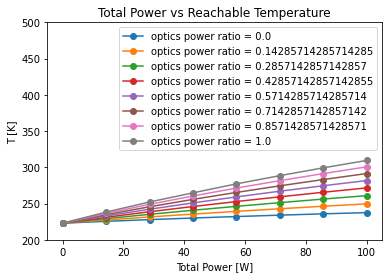

In [208]:
# 光学機器電力の比をとりあえず固定
optics_power_ratio_4 = optics_power_ratio[4]
# TECの比をとりあえず固定
tec_power_ratio_4 = tec_power_ratio[0]

# 光学機器の温度を格納するための配列
T_opt_zero = np.zeros((len(optics_power_ratio), len(P_total)))

# グラフの準備
pyplot.title('Total Power vs Reachable Temperature')
pyplot.xlabel('Total Power [W]')
pyplot.ylabel('T [K]')

# 光学機器の電力割合を振る
for i in range(len(optics_power_ratio)):
    print("==== Optics Ratio: %f ====" % optics_power_ratio[i])
    # 合計消費電力を振る
    for j in range(len(P_total)):

        # 光学機器電力
        P_optics = optics_power_ratio[i] * P_total[j]
        # TEC使用電力
        P_tec = tec_power_ratio_4 * (P_total[j]-P_optics)
        # 計算で使うためにQgの0要素目にセットする
        Qg[0] = P_optics
        Qg[4] = P_total[j]-P_optics-P_tec

        # 条件をアウトプット
        print("   === Total Power: %f ===" % P_total[j])
        print("    P_optics: %f" % P_optics)
        print("    P_tec: %f" % P_tec)

        # 非線形連立方程式の初期解をfor文で探すパターン
        N_rand = 20
        T_max = 350
        T_min = 100
        T_rand_arr = (T_max - T_min)*np.random.rand(N_rand, N_node)+T_min
        # print(T_rand_arr[0])
        # ノルムで最小値をセットする（ありえないくらい大きな値でセット）
        min_norm=100
        # まずは候補となりそうな初期解をざっくり見つける
        for T_rand_arr_i in T_rand_arr:
            result = optimize.root(func_const_power_tec, T_rand_arr_i, method="broyden1")
            T_rand_result = result.x
            norm = np.linalg.norm(func_const_power_tec(T_rand_result), ord=2)
        #     print('Error: {}'.format(norm))
            if norm < min_norm:
                min_norm = norm
                result_min_norm = result
            # もしちゃんと収束していたら、ループを抜ける
            if result.success == True:
                result_min_norm = result
                break
        #     print(np.linalg.norm(func2(T_rand_result), ord=2))
        #     print(T_rand_result)
    #     print(result_min_norm.x)
        T_opt_zero[i][j]=result_min_norm.x[0]
        print("    Temperatures : ")
        print(result_min_norm.x)
        print("    Error norm: %f" % np.linalg.norm(func_const_power_tec(result_min_norm.x), ord=2))

    
    # P vs Tのグラフを出力する
    pyplot.plot(P_total, T_opt_zero[i],'o-', label = 'optics power ratio = {0}'.format(optics_power_ratio[i]))

# グラフ範囲指定
pyplot.ylim(200, 500)
# 最後にグラフに出力する
pyplot.legend()
pyplot.show()

### TECの電力をちゃんと振ったとき

==== Optics Ratio: 0.000000 ====
   === Total Power: 0.000000 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[222.95872156 222.95825898 222.95047508 264.04647338 324.22966335
 222.94428678 324.16481417]
    Error norm: 0.000008
   === Total Power: 14.285714 ===
    P_optics: 0.000000
    P_tec: 8.163265
    Temperatures : 
[220.63973507 220.63907277 231.78602482 269.13557273 331.00322016
 230.95672989 328.65324974]
    Error norm: 0.000002
   === Total Power: 28.571429 ===
    P_optics: 0.000000
    P_tec: 16.326531
    Temperatures : 
[224.29325067 224.29253028 240.03278053 274.17471599 337.63605546
 238.38227928 332.94833893]
    Error norm: 0.000001
   === Total Power: 42.857143 ===
    P_optics: 0.000000
    P_tec: 24.489796
    Temperatures : 
[228.41332358 228.41256136 247.7664481  279.21711741 344.06644666
 245.29495832 337.02946429]
    Error norm: 0.000003
   === Total Power: 57.142857 ===
    P_optics: 0.000000
    P_tec: 32.653061
    Temperatures : 
[232

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[227.1983557  227.1670288  241.2849262  275.67774464 336.42069414
 239.45910588 332.3867928 ]
    Error norm: 0.000005
   === Total Power: 42.857143 ===
    P_optics: 6.122449
    P_tec: 20.991254
    Temperatures : 
[232.32565935 232.27899158 249.53915519 280.31156978 342.20186249
 246.80474303 336.16523281]
    Error norm: 0.000002
   === Total Power: 57.142857 ===
    P_optics: 8.163265
    P_tec: 27.988338
    Temperatures : 
[237.39628704 237.33428231 257.29482025 284.98174835 347.72621069
 253.65186892 339.7182557 ]
    Error norm: 0.000008
   === Total Power: 71.428571 ===
    P_optics: 10.204082
    P_tec: 34.985423
    Temperatures : 
[242.34294651 242.26559665 264.65478496 290.53061284 353.28106452
 260.10318449 343.20968991]
    Error norm: 0.000001
   === Total Power: 85.714286 ===
    P_optics: 12.244898
    P_tec: 41.982507
    Temperatures : 
[247.09193003 246.99923596 271.62444019 295.98856061 358.54985147
 266.16420314 346.47919665]
    Error norm: 

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.93168237 222.93121401 222.92333648 264.53684379 324.08590998
 222.91706654 324.08213968]
    Error norm: 0.000003
   === Total Power: 14.285714 ===
    P_optics: 4.081633
    P_tec: 5.830904
    Temperatures : 
[224.17229322 224.14104894 233.07138478 269.67651833 329.61349729
 232.06710213 327.99048911]
    Error norm: 0.000005
   === Total Power: 28.571429 ===
    P_optics: 8.163265
    P_tec: 11.661808
    Temperatures : 
[230.20327779 230.14135709 242.51086355 276.27687753 335.13397898
 240.50989471 331.78171582]
    Error norm: 0.000004
   === Total Power: 42.857143 ===
    P_optics: 12.244898
    P_tec: 17.492711
    Temperatures : 
[236.37808536 236.28551332 251.2888238  281.59678082 340.3196411
 248.29150646 335.28701688]
    Error norm: 0.000001
   === Total Power: 57.142857 ===
    P_optics: 16.326531
    P_tec: 23.323615
    Temperatures : 
[242.39055696 242.26734389 259.50889666 286.23272389 345.21336761
 255.51537048 338.54725145]
    Error norm: 0.

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[226.11382919 226.06730298 233.74109873 269.47230068 329.09492371
 232.64943917 327.75649846]
    Error norm: 0.000006
   === Total Power: 28.571429 ===
    P_optics: 12.244898
    P_tec: 9.329446
    Temperatures : 
[233.36231272 233.26981196 243.72815907 275.97414824 333.87983051
 241.55222351 331.19057882]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 18.367347
    P_tec: 13.994169
    Temperatures : 
[240.61717908 240.47870325 253.01409063 283.23518983 338.39719783
 249.75387378 334.38288265]
    Error norm: 0.000006
   === Total Power: 57.142857 ===
    P_optics: 24.489796
    P_tec: 18.658892
    Temperatures : 
[247.62542642 247.44100611 261.70995732 287.92670879 342.80213062
 257.36586014 337.4259984 ]
    Error norm: 0.000007
   === Total Power: 71.428571 ===
    P_optics: 30.612245
    P_tec: 23.323615
    Temperatures : 
[254.33503766 254.10465901 269.89525318 293.66338174 346.98818163
 264.46710737 340.27882572]
    Error norm:

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[228.19236359 228.13053463 234.39572303 271.40199325 328.47205986
 233.21641147 327.46629003]
    Error norm: 0.000006
   === Total Power: 28.571429 ===
    P_optics: 16.326531
    P_tec: 6.997085
    Temperatures : 
[236.72985953 236.60676022 244.92694853 277.72302926 332.52353332
 242.57580932 330.54524879]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 24.489796
    P_tec: 10.495627
    Temperatures : 
[245.11919002 244.93482967 254.71158182 283.7190383  336.46391985
 251.18872588 333.46641027]
    Error norm: 0.000002
   === Total Power: 57.142857 ===
    P_optics: 32.653061
    P_tec: 13.994169
    Temperatures : 
[253.13907176 252.89344933 263.8376532  289.69917298 340.10532905
 259.14307308 336.14029045]
    Error norm: 0.000006
   === Total Power: 71.428571 ===
    P_optics: 40.816327
    P_tec: 17.492711
    Temperatures : 
[260.82208162 260.51519536 272.45362391 295.67136567 343.8681555
 266.58730143 338.81184211]
    Error norm: 

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.92711265 222.92664944 222.91885862 264.0745179  324.07421651
 222.91265767 324.07484455]
    Error norm: 0.000000
   === Total Power: 14.285714 ===
    P_optics: 10.204082
    P_tec: 2.332362
    Temperatures : 
[230.51777028 230.44067291 235.06392071 270.77423656 327.98608995
 233.7974114  327.25055891]
    Error norm: 0.000007
   === Total Power: 28.571429 ===
    P_optics: 20.408163
    P_tec: 4.664723
    Temperatures : 
[240.45613858 240.30246324 246.13743037 278.22844888 331.32495713
 243.61137232 329.98378639]
    Error norm: 0.000000
   === Total Power: 42.857143 ===
    P_optics: 30.612245
    P_tec: 6.997085
    Temperatures : 
[250.04832849 249.81808045 256.39162484 285.3531104  334.49618693
 252.60608482 332.53045699]
    Error norm: 0.000009
   === Total Power: 57.142857 ===
    P_optics: 40.816327
    P_tec: 9.329446


C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()


    Temperatures : 
[259.18834012 258.8815293  265.97142858 291.36669365 337.65252616
 260.9265394  334.98203897]
    Error norm: 0.000005
   === Total Power: 71.428571 ===
    P_optics: 51.020408
    P_tec: 11.661808
    Temperatures : 
[267.85829578 267.47493236 274.94750692 296.13955873 340.5820651
 268.64340743 337.24154764]
    Error norm: 0.000004
   === Total Power: 85.714286 ===
    P_optics: 61.224490
    P_tec: 13.994169
    Temperatures : 
[276.14605256 275.68612066 283.45315054 301.99561636 343.54308391
 275.88962361 339.46208769]
    Error norm: 0.000012
   === Total Power: 100.000000 ===
    P_optics: 71.428571
    P_tec: 16.326531
    Temperatures : 
[284.01491597 283.47842692 291.47210804 306.55940006 346.13309657
 282.6493081  341.42261306]
    Error norm: 0.000003
==== Optics Ratio: 0.857143 ====
   === Total Power: 0.000000 ===
    P_optics: 0.000000
    P_tec: 0.000000
    Temperatures : 
[222.92614556 222.92568247 222.91789377 264.0625885  324.07048237
 222.9116945

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[233.23001967 233.13769653 235.67113099 267.17134212 327.28913308
 234.31800523 326.91213415]
    Error norm: 0.000039
   === Total Power: 28.571429 ===
    P_optics: 24.489796
    P_tec: 2.332362
    Temperatures : 
[244.79424419 244.61000336 247.30022567 279.0426953  329.89813428
 244.59939971 329.29272276]
    Error norm: 0.000006
   === Total Power: 42.857143 ===
    P_optics: 36.734694
    P_tec: 3.498542
    Temperatures : 
[255.8047387  255.52862819 258.06631373 286.40824138 332.65219946
 254.0184277  331.6532192 ]
    Error norm: 0.000004
   === Total Power: 57.142857 ===
    P_optics: 48.979592
    P_tec: 4.664723
    Temperatures : 
[266.17979001 265.81182201 268.05743805 292.19384142 335.09219296
 262.6626582  333.75614341]
    Error norm: 0.000001
   === Total Power: 71.428571 ===
    P_optics: 61.224490
    P_tec: 5.830904
    Temperatures : 
[276.00755253 275.54771157 277.42280058 298.88524901 337.38331741
 270.68091909 335.71044293]
    Error norm: 0.

C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: divide by zero encountered in true_divide
  d = v / vdot(df, v)
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:771: RuntimeWarning: invalid value encountered in multiply
  self.collapsed += c[:,None] * d[None,:].conj()
C:\Users\lotus\anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


    Temperatures : 
[222.89428153 222.89381185 222.88592009 264.61131851 323.93758897
 222.87964443 323.99417273]
    Error norm: 0.000010
   === Total Power: 14.285714 ===
    P_optics: 14.285714
    P_tec: 0.000000
    Temperatures : 
[238.16934707 238.06173706 236.29396396 273.44171985 326.43631963
 234.8533971  326.49180883]
    Error norm: 0.000007
   === Total Power: 28.571429 ===
    P_optics: 28.571429
    P_tec: 0.000000
    Temperatures : 
[252.16252162 251.947769   248.49349859 281.11943938 328.70863344
 245.61861928 328.73247703]
    Error norm: 0.000004
   === Total Power: 42.857143 ===
    P_optics: 42.857143
    P_tec: 0.000000
    Temperatures : 
[265.10898536 264.78708777 259.70711864 287.8976664  330.71797517
 255.39789665 330.72373288]
    Error norm: 0.000001
   === Total Power: 57.142857 ===
    P_optics: 57.142857
    P_tec: 0.000000
    Temperatures : 
[276.81200891 276.38291301 269.72413312 298.12109661 329.60396875
 263.97985438 330.89477601]
    Error norm: 0.

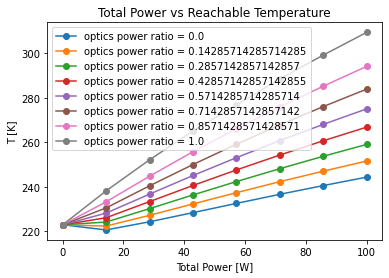

In [204]:
# 光学機器電力の比をとりあえず固定
optics_power_ratio_4 = optics_power_ratio[4]
# TECの比をとりあえず固定
tec_power_ratio_4 = tec_power_ratio[4]

# 光学機器の温度を格納するための配列
T_opt = np.zeros((len(optics_power_ratio), len(P_total)))

# グラフの準備
pyplot.title('Total Power vs Reachable Temperature')
pyplot.xlabel('Total Power [W]')
pyplot.ylabel('T [K]')

# 光学機器の電力割合を振る
for i in range(len(optics_power_ratio)):
    print("==== Optics Ratio: %f ====" % optics_power_ratio[i])
    # 合計消費電力を振る
    for j in range(len(P_total)):

        # 光学機器電力
        P_optics = optics_power_ratio[i] * P_total[j]
        # TEC使用電力
        P_tec = tec_power_ratio_4 * (P_total[j]-P_optics)
        # 計算で使うためにQgの0要素目にセットする
        Qg[0] = P_optics
        Qg[4] = P_total[j]-P_optics-P_tec

        # 条件をアウトプット
        print("   === Total Power: %f ===" % P_total[j])
        print("    P_optics: %f" % P_optics)
        print("    P_tec: %f" % P_tec)

        # 非線形連立方程式の初期解をfor文で探すパターン
        N_rand = 20
        T_max = 350
        T_min = 100
        T_rand_arr = (T_max - T_min)*np.random.rand(N_rand, N_node)+T_min
        # print(T_rand_arr[0])
        # ノルムで最小値をセットする（ありえないくらい大きな値でセット）
        min_norm=100
        # まずは候補となりそうな初期解をざっくり見つける
        for T_rand_arr_i in T_rand_arr:
            result = optimize.root(func_const_power_tec, T_rand_arr_i, method="broyden1")
            T_rand_result = result.x
            norm = np.linalg.norm(func_const_power_tec(T_rand_result), ord=2)
        #     print('Error: {}'.format(norm))
            if norm < min_norm:
                min_norm = norm
                result_min_norm = result
            # もしちゃんと収束していたら、ループを抜ける
            if result.success == True:
                result_min_norm = result
                break
        #     print(np.linalg.norm(func2(T_rand_result), ord=2))
        #     print(T_rand_result)
    #     print(result_min_norm.x)
        T_opt[i][j]=result_min_norm.x[0]
        print("    Temperatures : ")
        print(result_min_norm.x)
        print("    Error norm: %f" % np.linalg.norm(func_const_power_tec(result_min_norm.x), ord=2))

    
    # P vs Tのグラフを出力する
    pyplot.plot(P_total, T_opt[i],'o-', label = 'optics power ratio = {0}'.format(optics_power_ratio[i]))

# グラフ範囲指定
# pyplot.ylim(200, 500)
# 最後にグラフに出力する
pyplot.legend()
pyplot.show()

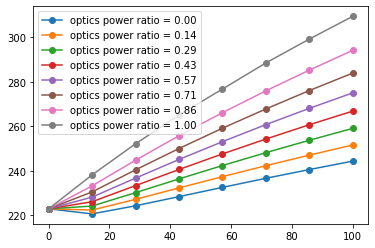

In [212]:
# 光学機器の電力割合を振る
for i in range(len(optics_power_ratio)):
     # P vs Tのグラフを出力する
    pyplot.plot(P_total, T_opt[i],'o-', label = 'optics power ratio = {0:.2f}'.format(optics_power_ratio[i]))

# グラフ範囲指定
# pyplot.ylim(200, 500)
# 最後にグラフに出力する
pyplot.legend()
pyplot.show()

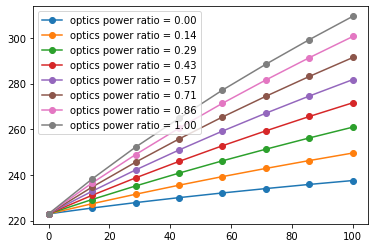

In [211]:
# 光学機器の電力割合を振る
for i in range(len(optics_power_ratio)):
     # P vs Tのグラフを出力する
    pyplot.plot(P_total, T_opt_zero[i],'o-', label = 'optics power ratio = {0:.2f}'.format(optics_power_ratio[i]))

# グラフ範囲指定
# pyplot.ylim(200, 500)
# 最後にグラフに出力する
pyplot.legend()
pyplot.show()

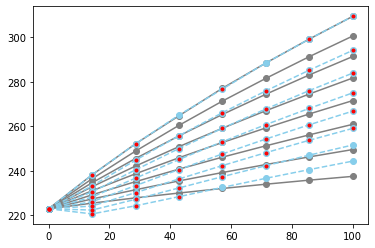

In [225]:
# 光学機器の電力割合を振る
for i in range(len(optics_power_ratio)):
     # P vs Tのグラフを出力する
    pyplot.plot(P_total, T_opt_zero[i],'o-',label="Without TEC", color="gray")
    pyplot.plot(P_total, T_opt[i],'o--', label="With TEC", color="skyblue")
    
# TECありのほうが良い場合の点の描写
for i in range(len(optics_power_ratio)):
    for j in range(len(P_total)):
        # P vs Tのグラフを出力する
        if T_opt_zero[i][j] >= T_opt[i][j]:
            pyplot.plot(P_total[j], T_opt[i][j], marker=".", color="red")
    

# グラフ範囲指定
# pyplot.ylim(200, 500)
# 最後にグラフに出力する
# pyplot.legend()
pyplot.show()